# 2.2 The Split-Apply-Combine Strategy

In [2]:
%matplotlib inline
import pandas as pd

**Documentation**

* pandas.Series.unique(): https://pandas.pydata.org/docs/reference/api/pandas.Series.unique.html

* pandas.DataFrame.groupby(): https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html


In the previous section, we discussed how to restrict our analysis to a particular subset of observations using boolean masks. So, for example, if we wanted to calculate the survival rate for passengers in third class, we would write:

In [3]:
df = pd.read_csv("../data/titanic.csv")
df[df.pclass == 3].survived.mean()

0.2552891396332863

In [9]:
df.sex.value_counts(), df[df.survived==1].sex.value_counts()

(male      843
 female    466
 Name: sex, dtype: int64,
 female    339
 male      161
 Name: sex, dtype: int64)

In [5]:
df

pclass  survived                                             name  \
0          1         1                    Allen, Miss. Elisabeth Walton   
1          1         1                   Allison, Master. Hudson Trevor   
2          1         0                     Allison, Miss. Helen Loraine   
3          1         0             Allison, Mr. Hudson Joshua Creighton   
4          1         0  Allison, Mrs. Hudson J C (Bessie Waldo Daniels)   
...      ...       ...                                              ...   
1304       3         0                             Zabour, Miss. Hileni   
1305       3         0                            Zabour, Miss. Thamine   
1306       3         0                        Zakarian, Mr. Mapriededer   
1307       3         0                              Zakarian, Mr. Ortin   
1308       3         0                               Zimmerman, Mr. Leo   

         sex      age  sibsp  parch  ticket      fare    cabin embarked boat  \
0     female  29.0000      0      0   24160  211.3375       B5        S    2   
1       male   0.9167      1      2  113781  151.5500  C22 C26        S   11   
2     female   2.0000      1      2  113781  151.5500  C22 C26        S  NaN   
3       male  30.0000      1      2  113781  151.5500  C22 C26        S  NaN   
4     female  25.0000      1      2  113781  151.5500  C22 C26        S  NaN   
...      ...      ...    ...    ...     ...       ...      ...      ...  ...   
1304  female  14.5000      1      0    2665   14.4542      NaN        C  NaN   
1305  female      NaN      1      0    2665   14.4542      NaN        C  NaN   
1306    male  26.5000      0      0    2656    7.2250      NaN        C  NaN   
1307    male  27.0000      0      0    2670    7.2250      NaN        C  NaN   
1308    male  29.0000      0      0  315082    7.8750      NaN        S  NaN   

       body                        home.dest  
0       NaN                     St Louis, MO  
1       NaN  Montreal, PQ / Chesterville, ON  
2       NaN  Montreal, PQ / Chesterville, ON  
3     135.0  Montreal, PQ / Chesterville, ON  
4       NaN  Montreal, PQ / Chesterville, ON  
...     ...                              ...  
1304  328.0                              NaN  
1305    NaN                              NaN  
1306  304.0                              NaN  
1307    NaN                              NaN  
1308    NaN                              NaN  

[1309 rows x 14 columns]

But what if we wanted to calculate the survival rate by class? We could slice the data set three times, once for each class:

In [10]:
df[df.pclass == 1].survived.mean()


0.6191950464396285

In [11]:
(df[df.pclass == 1].survived.mean(), 
 df[df.pclass == 2].survived.mean(), 
 df[df.pclass == 3].survived.mean())

(0.6191950464396285, 0.4296028880866426, 0.2552891396332863)

We could, in fact, represent the output is a dictionary in which each of the values is indexed by the class


In [24]:
    #====SPLIT======== ======APPLY====
{1:df[df.pclass == 1].survived.mean(), 
 2: df[df.pclass == 2].survived.mean(), 
 3: df[df.pclass == 3].survived.mean()
}  # <-  COMBINE
 



{1: 0.6191950464396285, 2: 0.4296028880866426, 3: 0.2552891396332863}

But this code is inefficient and repetitive. It also does not generalize well to variables that have hundreds of possible values. 

We could do a little bit better with **list (or, in our case - dictionary) comprehensions**.


In [14]:
## here is how we find out the list of unique values in a column/Series

df.pclass.unique()

array([1, 2, 3])

In [19]:
{cl: df[df["pclass"]==cl].survived.mean()  for cl in df.pclass.unique()}

{1: 0.6191950464396285, 2: 0.4296028880866426, 3: 0.2552891396332863}

The problem of calculating the survival rate by class is an example of a problem that can be solved using the **split-apply-combine strategy**. The operations and procedures implementing this strategy are known as **grouping-and-aggregation** operations. 

The key insight here is that many data analyses follow the same basic pattern:

- First, a data set is **split** into several subsets based on some variable.
- Next, some analysis is **applied** to each subset.
- Finally, the results from each analysis are **combined** for display/presentation/further analysis purposes.

The three steps are diagrammed in the figure below:

![](split_apply_combine.png) [source](https://github.com/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/03.08-Aggregation-and-Grouping.ipynb)

Applying this strategy to our working example above, we should first _split_ up the Titanic data according to the value of `pclass`, _apply_ `.survived.mean()` to each subset, and finally _combine_ the results into one `Series`.

[_Note:_ The term "split-apply-combine" was coined by Hadley Wickham in [a 2011 paper](https://www.jstatsoft.org/article/view/v040i01), but the idea is not new. It should already be familiar to you if you know SQL or MapReduce.]

**Alex's Note** Here is one example of split-apply-combine pattern that we have seen implemented in `pandas`

In [21]:
df.pclass.value_counts()

3    709
1    323
2    277
Name: pclass, dtype: int64

## Split-Apply-Combine in `pandas`: the `.groupby()` method

The `.groupby()` method in Pandas is used to implement the split-apply-combine strategy.  Note, that whereas most other methods we
studied to date, which were part of the `pandas.Series` interface, `.groupby()` is actually part of the `pandas.DataFrame` class/interface.

First, we specify one or more variables to split on, using the `.groupby()` method. Then, we specify our analysis as usual. Pandas will take care of splitting the data, applying the analysis to each subset, and combining the results at the end.

In [25]:
df.survived.mean()

0.3819709702062643

In [35]:
df.groupby("pclass").survived.mean()

pclass
1    0.619195
2    0.429603
3    0.255289
Name: survived, dtype: float64

In [34]:
type(df.groupby("pclass").survived.mean())

pandas.core.series.Series

The `groupby()` method followed by an aggregation method returns a `pandas.Series` object

Compare the code above with the code we would write to calculate the overall survival rate:

`df.survived.mean()`.

The only difference is `.groupby("pclass")`. This creates a `DataFrameGroupBy` object, which behaves like a `DataFrame`, except that any analysis that we specify will be applied to each subset instead of the entire `DataFrame`.

In [40]:
df.groupby("pclass").survived

In [29]:
df.groupby("pclass").count()

survived  name  sex  age  sibsp  parch  ticket  fare  cabin  embarked  \
pclass                                                                          
1            323   323  323  284    323    323     323   323    256       321   
2            277   277  277  261    277    277     277   277     23       277   
3            709   709  709  501    709    709     709   708     16       709   

        boat  body  home.dest  
pclass                         
1        201    35        289  
2        112    31        261  
3        173    55        195

In [32]:
df.groupby("pclass"),len(df.groupby("pclass")), len(df)

(<pandas.core.groupby.generic.DataFrameGroupBy object at 0x7f2cd98a7a00>,
 3,
 1309)

**Notice**, that the result of the `df.groupby` shows an object that contains 3 "rows". As seen in the output of `df.groupby("pclass").count()` the values of the `pclass` variable become values of the index.


`.groupby()` even works with visualizations! To plot the age distribution of the survivors and non-survivors, we can group by the `survived` variable and then ask for a histogram of `age`. Behind the scenes, `pandas` will do this once for the survivors and again for the non-survivors and then combine them into one histogram.

survived
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: age, dtype: object

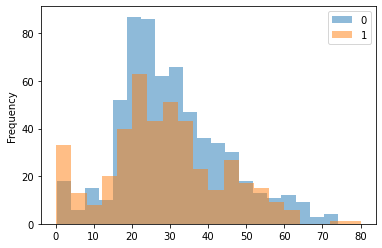

In [45]:
df.groupby("survived").age.plot.hist(bins=20, alpha=0.5, legend=True)

<AxesSubplot:ylabel='pclass,survived'>

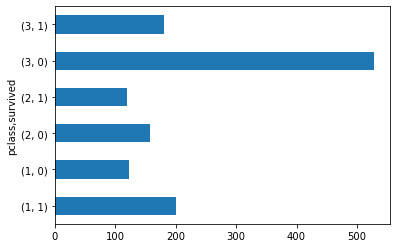

In [47]:
df.groupby("pclass").survived.value_counts().plot.barh()

Some attempts to graph things at the same time are more complex than others, and perhaps less useful

pclass
1    AxesSubplot(0.125,0.125;0.775x0.755)
2    AxesSubplot(0.125,0.125;0.775x0.755)
3    AxesSubplot(0.125,0.125;0.775x0.755)
Name: survived, dtype: object

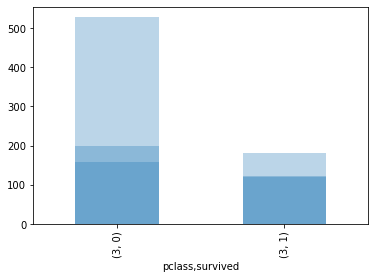

In [51]:
df.groupby("pclass").survived.value_counts().groupby("pclass").plot.bar(alpha=0.3)

It is also possible to group by more than one variable. Simply pass in a list of variable names to `.groupby()`. For example, to calculate the survival rate by class and sex, we could do:

In [60]:
survival_rates = df.groupby(["pclass", "sex"]).survived.mean()

type(survival_rates)

pandas.core.series.Series

<AxesSubplot:xlabel='pclass,sex'>

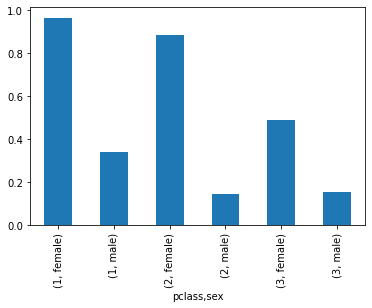

In [58]:
survival_rates.plot.bar()

It's clear that survival rates on the Titanic varied drastically by class and by sex.

Notice that when we use `.groupby()`, the resulting index is whatever variable(s) we grouped by. Since we grouped by two variables, this index actually has two levels. An index with more than one level is called a `MultiIndex` in `pandas`. To access a particular row in a `DataFrame` that is indexed by a `MultiIndex`, we pass in a tuple of the values we want from each level.

So, for example, to get female passengers in 2nd class, we would do:

In [61]:
survival_rates.loc[(2, "female")]

0.8867924528301887

If we pass in fewer values than there are levels in the index, `pandas` will return everything from the remaining levels.

In [62]:
survival_rates.loc[2]

sex
female    0.886792
male      0.146199
Name: survived, dtype: float64

# Exercises

Exercises 1-5 work with the Tips data set (`/data301/data/tips.csv`). The following code reads in the data into a `DataFrame` called `tips` and creates a new column called `tip_percent` out of the `tip` and `total_bill` columns. This new column represents the percentage tip paid (as a number between 0 and 1).

In [42]:
tips = pd.read_csv("../data/tips.csv")
tips["tip_percent"] = tips.tip / tips.total_bill

In [43]:
tips.head()

total_bill   tip     sex smoker  day    time  size  tip_percent
0       16.99  1.01  Female     No  Sun  Dinner     2     0.059447
1       10.34  1.66    Male     No  Sun  Dinner     3     0.160542
2       21.01  3.50    Male     No  Sun  Dinner     3     0.166587
3       23.68  3.31    Male     No  Sun  Dinner     2     0.139780
4       24.59  3.61  Female     No  Sun  Dinner     4     0.146808

**Exercise 1.** On which day of the week does the waiter serve the largest parties, on average? (You did this exercise in the previous section. See how much easier it is to do using `.groupby()`.)

In [ ]:
# YOUR CODE HERE

**Exercise 2.** Calculate the average bill by day and time. What day-time combination has the highest average bill?

In [ ]:
# YOUR CODE HERE

**Exercise 3.** Extract the average bill for Friday lunch from the result of Exercise 2.

In [ ]:
# YOUR CODE HERE

**Exercise 4.** Use `.groupby()` to make a visualization comparing the distribution of tip percentages left by males and females. How do they compare?

In [ ]:
# YOUR CODE HERE

**Exercise 5.** Make a visualization that shows the average tip percentage as a function of table size.

In [ ]:
# YOUR CODE HERE

**Submission Instructions**

Submit using the following command:

            handin dekhtyar 301-lab05